In [34]:
import pandas as pd

p1="Bachelors_degree_CSV.csv"
p2="Masters_degree_CSV.csv"
p3="Doctrate_degree_CSV.csv"

df1=pd.read_csv(p1)
df2=pd.read_csv(p2)
df3=pd.read_csv(p3)

In [35]:
df3.drop([1,2,34,35,36,37,38],0,inplace=True);
df2.drop([1,2,36,37,38,39,40],0,inplace=True);
df1.drop([1,2,36,37,38,39,40],0,inplace=True);

In [36]:
df1=df1.rename(columns=df1.iloc[0]).drop(df1.index[0])
df2=df2.rename(columns=df2.iloc[0]).drop(df2.index[0])
df3=df3.rename(columns=df3.iloc[0]).drop(df3.index[0])

In [37]:
df1=df1.fillna(0)
df2=df2.fillna(0)
df3=df3.fillna(0)



In [38]:
df1 = df1.replace(',','', regex=True)
df2 = df2.replace(',','', regex=True)
df3 = df3.replace(',','', regex=True)

In [39]:
def change_dtype(value):
      try:
          return int(value)
      except ValueError:
          try:
              return float(value)
          except ValueError:
              return value

for column in df1.columns:
      df1.loc[:, column] = df1[column].apply(change_dtype)
for column in df2.columns:
     df2.loc[:, column] = df2[column].apply(change_dtype)
for column in df3.columns:
      df3.loc[:, column] = df3[column].apply(change_dtype)


In [56]:
df=pd.concat([df1, df2,df3]).groupby(['Field of study']).sum().reset_index()
df=df.reindex()
df['sum']=df.sum(axis=1)
sum=df[["Field of study","sum"]].to_csv("college_sum.csv")

<AxesSubplot:>

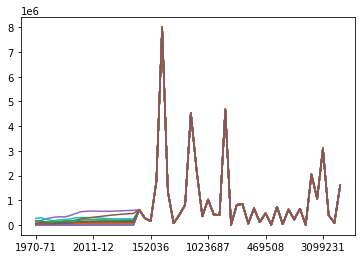

In [41]:
df = df.set_index('Field of study').T
df.plot(legend=False)

In [42]:
df.reindex()

df=df.rename( index={'1970-71': 1971,'1975-76':1976,'1980-81':1981,'1985-86':1986,'1990-91':1991,'1975-76':1976,'1995-96':1996,'2000-01':2001,'2005-06':2006,'2009-10':2010,'2011-12':2012,'2012-13':2013,'2013-14':2014,'2014-15':2015,'2015-16':2016,'2016-17':2017,'2017-18':2018,"2018-19":2019,"2010-11":2011})

In [43]:
df

Field of study,Agriculture and natural resources\1\,Architecture and related services,Area ethnic cultural gender and group studies,Biological and biomedical sciences,Business\2\,Communication journalism and related programs,Communications technologies,Computer and information sciences,Computer and information sciences,Education,...,Parks recreation leisure and fitness studies,Philosophy and religious studies,Physical sciences and science technologies,Precision production,Psychology,Public administration and social services,Social sciences and history,Theology and religious vocations,Transportation and materials moving,Visual and performing arts
1971,16215,7311,3754,44933,142660,12239,564,1716,2388,270014,...,1841,10030,32070,0,46048,13425,175523,11779,0,37690
1976,23670,12443,4756,63958,186669,23202,1410,2847,5652,287700,...,5768,10361,30274,0,63602,30941,146506,15476,225,51575
1981,26956,12701,3850,52484,259217,32495,2074,4470,15121,212066,...,6414,8418,32287,0,54867,34872,115580,18142,263,49762
1986,21782,12452,4092,46864,304299,45378,1793,8414,42337,168573,...,5232,8069,31092,2,54066,27961,107359,18521,2295,46383
1991,17604,13406,6168,48468,328605,56032,1614,10000,25159,204348,...,4826,9358,25863,2,73936,32685,140352,16373,3028,51681
1996,27235,12486,7468,72857,321543,52738,1341,11448,24506,216566,...,14762,9454,30215,20,92709,44577,145251,17718,4480,60643
2001,28769,12935,7931,72818,380297,63599,1607,17679,44142,239571,...,20479,10703,27127,33,95275,45289,145757,18282,4504,73719
2006,28899,15459,10184,85547,466150,81225,3511,18611,47702,289441,...,29677,14297,31226,64,112828,53182,182750,21735,6133,98206
2010,32707,17541,10648,104793,538116,89480,5248,19554,39593,292689,...,39215,15215,34512,39,126518,61999,197254,23638,6072,108959
2011,35642,17824,11146,109001,554597,92110,5361,21104,43066,298777,...,42737,15473,36386,48,131819,66264,202644,24617,6331,111862


In [44]:
names=df.iloc[:,0]
names

1971         16215
1976         23670
1981         26956
1986         21782
1991         17604
1996         27235
2001         28769
2006         28899
2010         32707
2011         35642
2012         38695
2013         41339
2014         43076
2015         44265
2016         45223
2017         46138
2018         47780
2019         49359
615354      615354
272090      272090
152036      152036
1769003    1769003
8005249    8005249
1348640    1348640
67043        67043
410081      410081
806938      806938
4542301    4542301
2213784    2213784
347945      347945
1023687    1023687
417883      417883
405505      405505
4674604    4674604
1870          1870
814673      814673
842608      842608
51407        51407
669315      669315
109679      109679
469508      469508
6649          6649
735794      735794
26445        26445
626106      626106
219751      219751
653232      653232
627            627
2050360    2050360
1053149    1053149
3099231    3099231
390132      390132
80159       

In [45]:
sum=df.sum(axis=1)
sum_df=pd.DataFrame({
    "Major":names,
    "Total": sum
})
sum_df

,Major,Total
1971,16215,1140292
1976,23670,1334230
1981,26956,1335793
1986,21782,1383953
1991,17604,1542948
1996,27235,1692479
2001,28769,1837258
2006,28899,2223022
2010,32707,2501822
2011,35642,2610802


In [46]:
sum_df=sum_df.sort_values(by="Total",ascending=False)

In [47]:
sum_df

,Major,Total
8005249,8005249,288188964
4674604,4674604,168285744
4542301,4542301,163522836
3099231,3099231,111572316
2213784,2213784,79696224
2050360,2050360,73812960
1769003,1769003,63684108
1595296,1595296,57430656
1348640,1348640,48551040
1053149,1053149,37913364


In [48]:
import plotly.express as px
fig = px.line(df)
fig.show()